In [10]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [11]:
#Import Dataset
df = pd.read_csv(r"C:\Users\janap\Downloads\archive (3)\heart.csv")  # path to dataset
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Decision Tree Accuracy: 0.9853658536585366


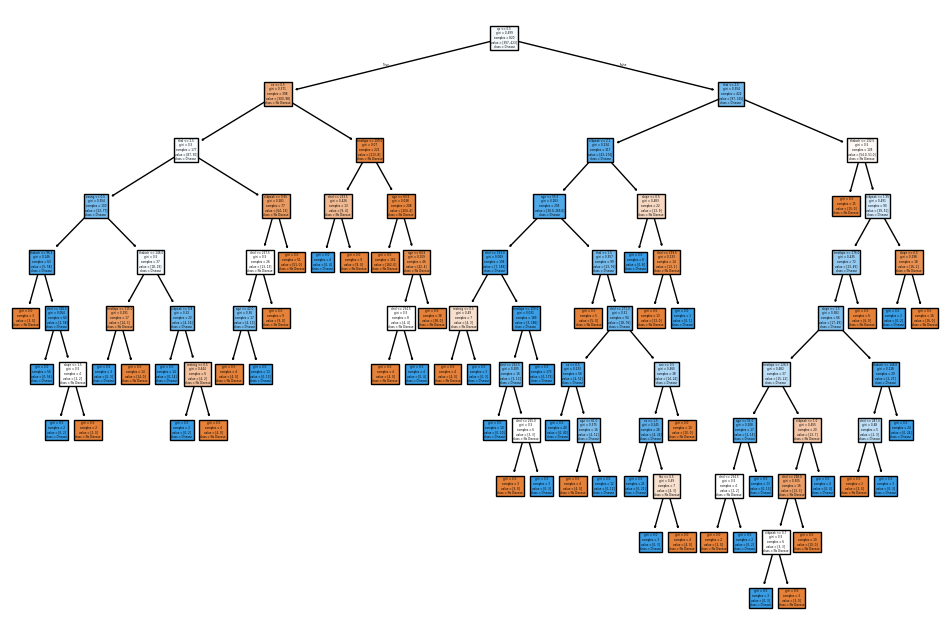

In [12]:
#Train a Decision Tree Classifier & Visualize
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

print("Decision Tree Accuracy:", dt.score(X_test, y_test))

plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease","Disease"], filled=True)
plt.show()

In [13]:
#Analyze Overfitting & Control Depth
dt_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_limited.fit(X_train, y_train)

print("Limited Depth Tree Accuracy:", dt_limited.score(X_test, y_test))

Limited Depth Tree Accuracy: 0.7804878048780488


In [14]:
#Train a Random Forest & Compare
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest Accuracy:", rf.score(X_test, y_test))

Random Forest Accuracy: 0.9853658536585366


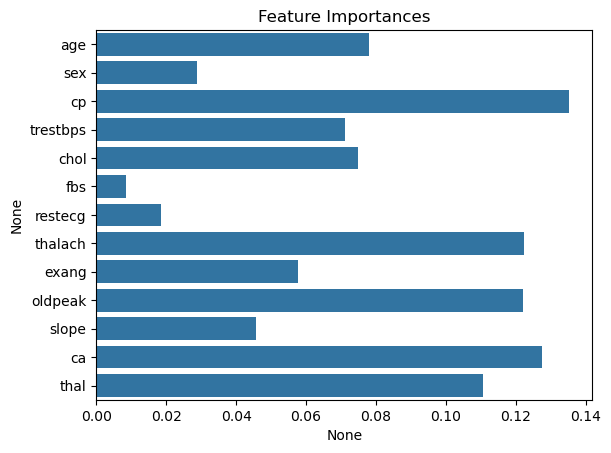

In [15]:
#Feature Importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importances")
plt.show()

In [16]:
#Cross-Validation
scores = cross_val_score(rf, X, y, cv=5, scoring="accuracy")
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9970731707317073


In [17]:
# Example: evaluate Decision Tree
y_pred_dt = dt.predict(X_test)

print("✅ Decision Tree Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

✅ Decision Tree Evaluation
Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Confusion Matrix:
 [[102   0]
 [  3 100]]


In [18]:
# Example: evaluate Random Forest
y_pred_rf = rf.predict(X_test)

print("\n✅ Random Forest Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


✅ Random Forest Evaluation
Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Confusion Matrix:
 [[102   0]
 [  3 100]]
